In [ ]:
#pandas
import pandas as pd

#matplotlib
import matplotlib.pyplot as plt

#seaborn
import seaborn as sns

#numpy
import numpy as np

#sklearn
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree  import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import pickle

In [ ]:
crop_df = pd.read_csv('/content/Crop_recommendation.csv')
crop_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
crop_df.shape

(2200, 8)

In [ ]:
crop_df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
crop_df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
crop_df['no_label'] = pd.Categorical(crop_df.label)

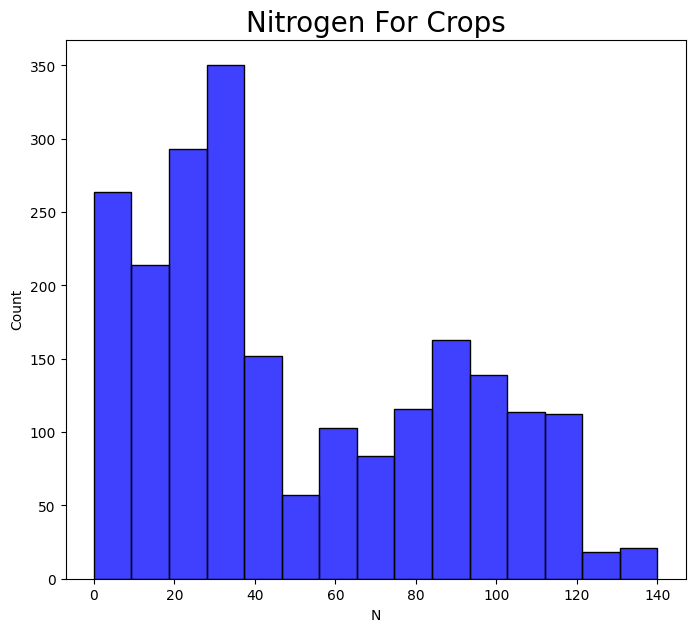

In [ ]:
plt.figure(figsize=(8,7))
sns.histplot(x='N',data=crop_df,color='b');
plt.title("Nitrogen For Crops",{'fontsize':20});

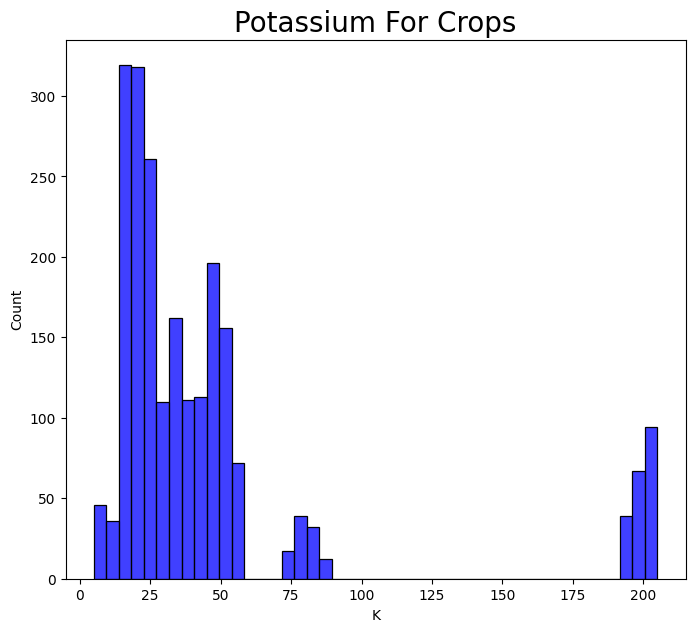

In [ ]:
plt.figure(figsize=(8,7))
sns.histplot(x='K',data=crop_df,color='b');
plt.title("Potassium For Crops",{'fontsize':20});

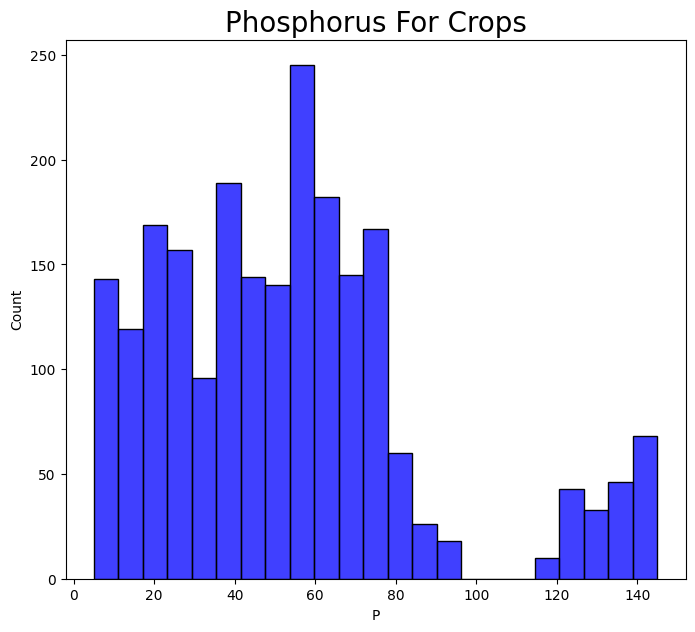

In [ ]:
plt.figure(figsize=(8,7))
sns.histplot(x='P',data=crop_df,color='b');
plt.title("Phosphorus For Crops",{'fontsize':20});

In [ ]:
crop_df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'no_label'],
      dtype='object')

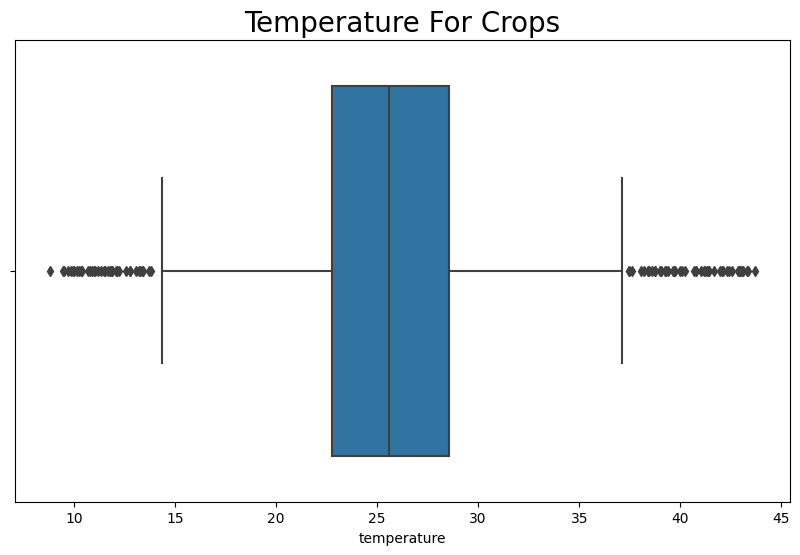

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=crop_df.temperature);
plt.title("Temperature For Crops",{'fontsize':20});

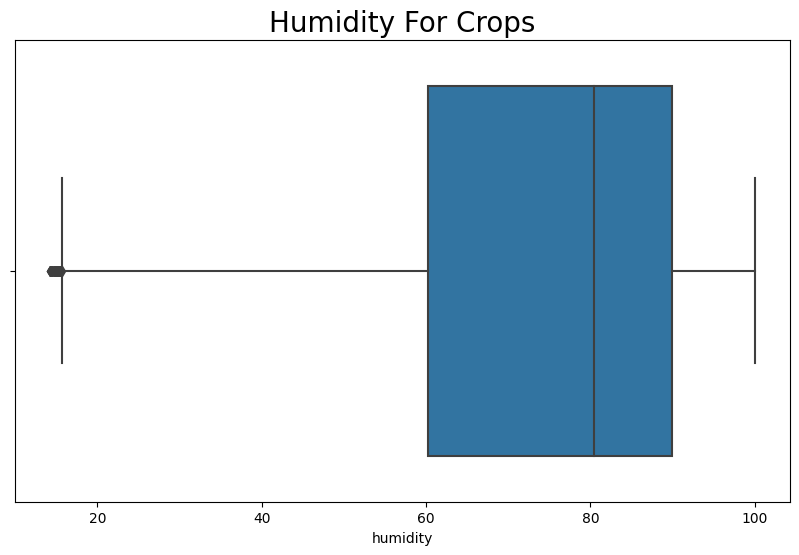

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=crop_df.humidity);
plt.title("Humidity For Crops",{'fontsize':20});

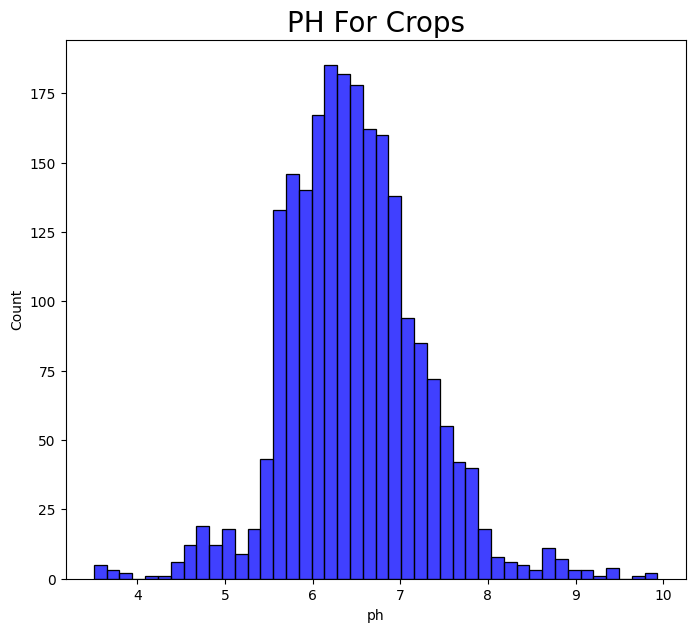

In [ ]:
plt.figure(figsize=(8,7))
sns.histplot(x='ph',data=crop_df,color='b');
plt.title("PH For Crops",{'fontsize':20});

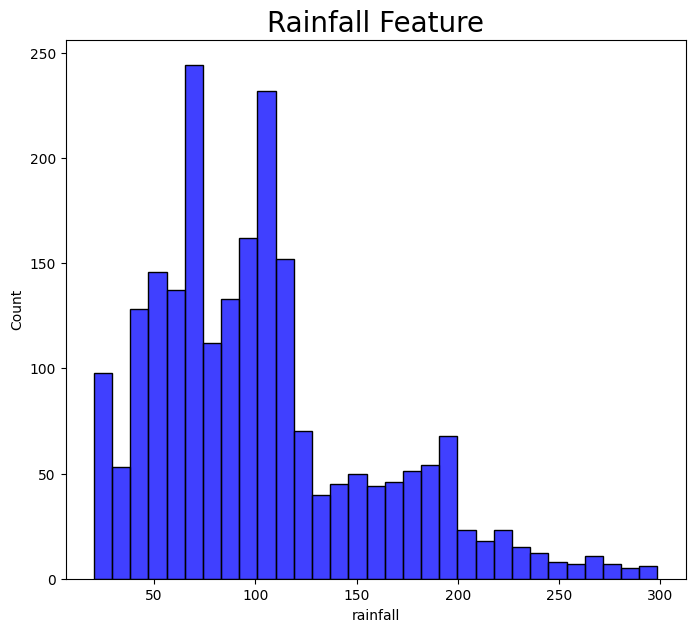

In [ ]:
plt.figure(figsize=(8,7))
sns.histplot(x='rainfall',data=crop_df,color='b');
plt.title("Rainfall Feature",{'fontsize':20});

<ipython-input-15-bcece4126942>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop_df['ph'])


<Axes: xlabel='ph', ylabel='Density'>

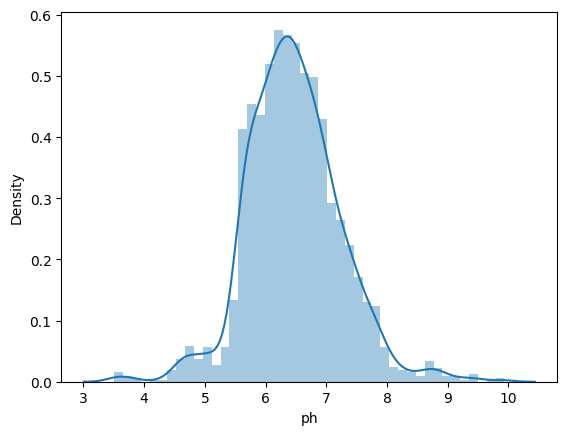

In [ ]:
#Distplot
sns.distplot(crop_df['ph'])

<Axes: xlabel='temperature', ylabel='no_label'>

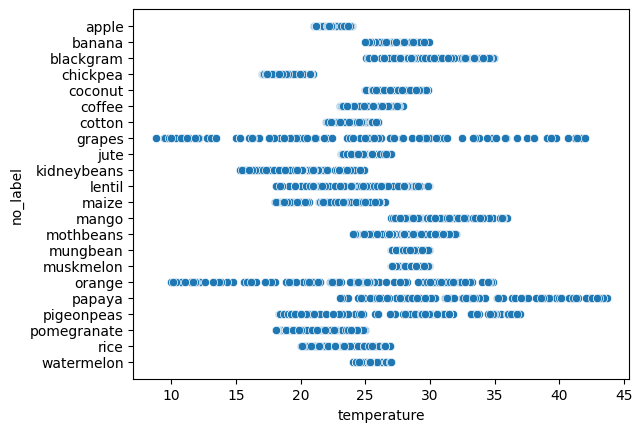

In [ ]:
sns.scatterplot(x=crop_df.temperature,y=crop_df.no_label)

<Axes: xlabel='N', ylabel='no_label'>

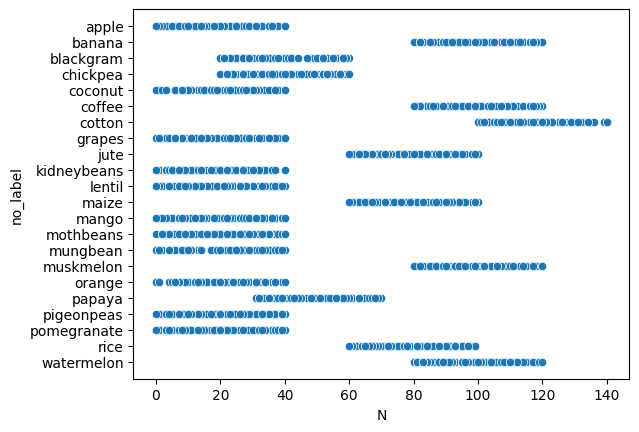

In [ ]:
sns.scatterplot(x=crop_df.N,y=crop_df.no_label)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


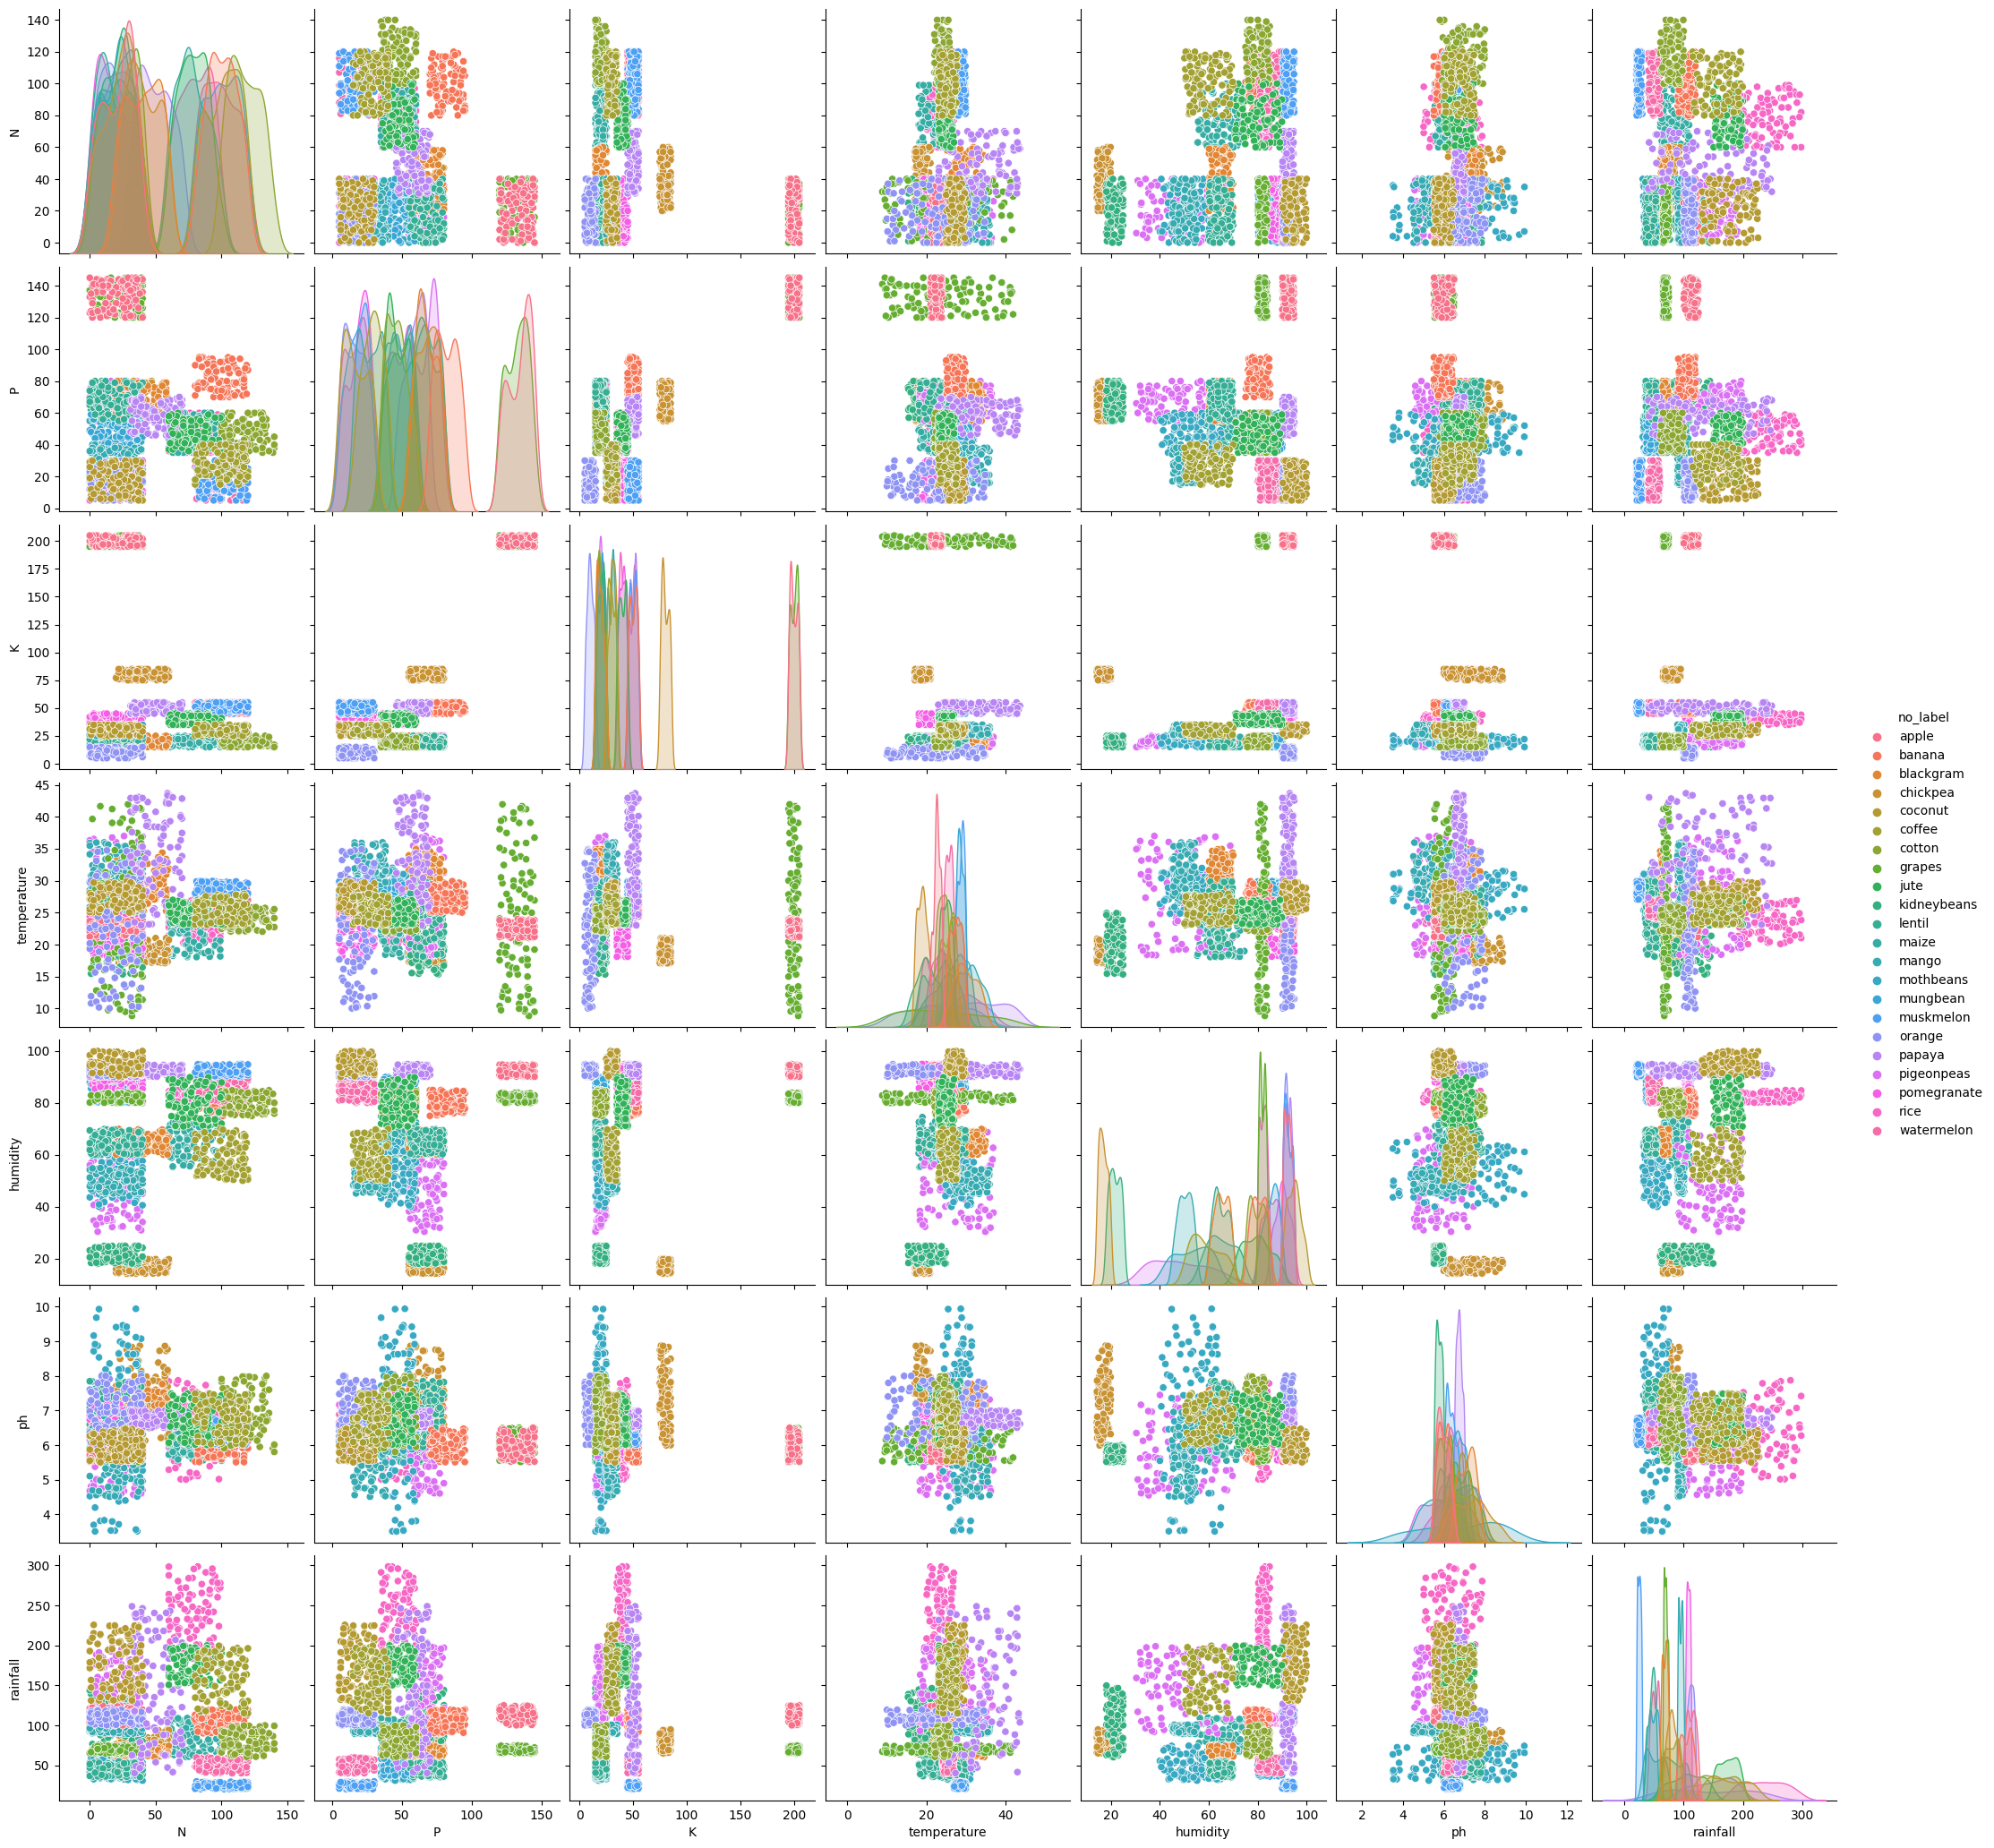

In [ ]:
sns.pairplot(crop_df,hue="no_label",size=3)

In [ ]:
corrmat =crop_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

<ipython-input-33-12220922b524>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat =crop_df.corr()


<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

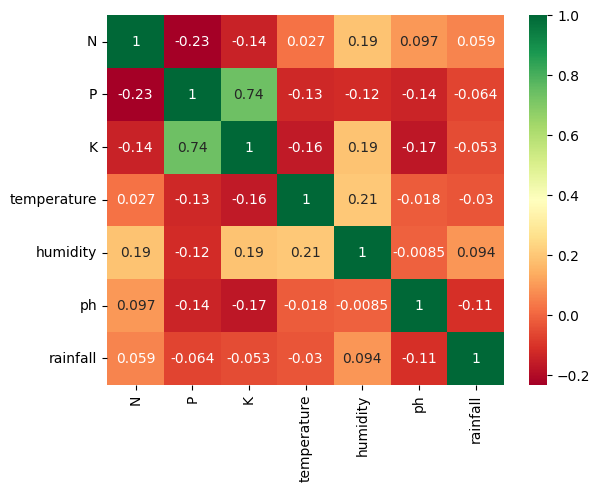

In [ ]:
g=sns.heatmap(crop_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
corrmat=crop_df.corr()
corrmat.style.background_gradient('coolwarm')

<ipython-input-35-acb63d5333c4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=crop_df.corr()


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [ ]:
X = crop_df.drop(['label','no_label'],axis=1)
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#y=le.fit_transform(crop_df['label'])
y= pd.Categorical(crop_df.label)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

X_train.head()


,N,P,K,temperature,humidity,ph,rainfall
1977,105,56,15,25.967797,81.979043,7.272316,74.141690
952,23,5,44,21.207254,94.263047,7.163005,107.566080
986,20,7,45,18.905923,89.241268,6.077886,112.475094
1981,121,53,19,23.513087,76.726214,7.976889,80.112721
1033,102,71,48,28.654563,79.286937,5.695268,102.463378


In [ ]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)
y=crop_df.no_label

In [ ]:
# Support Vector Machines Classifier
svm = SVC()
svm.fit(X_train, y_train)
print("The accuracy of SVM is",svm.score(X_train,y_train), svm.score(X_test,y_test))
svm = [svm.score(X_train,y_train), svm.score(X_test,y_test)]


The accuracy of SVM is 0.9880681818181818 0.9863636363636363


In [ ]:
#Random Forest Classifier Model
rfclassifier = RandomForestClassifier()
rfclassifier.fit(X_train, y_train)
print("The accuracy of random forest Classifier is",
      rfclassifier.score(X_train,y_train), rfclassifier.score(X_test,y_test))
rf = [rfclassifier.score(X_train,y_train), rfclassifier.score(X_test,y_test)]

The accuracy of random forest Classifier is 1.0 0.9977272727272727


In [ ]:
#Decision Tree Classifier Model
dtclassifier = DecisionTreeClassifier(max_depth=7)
dtclassifier.fit(X_train,y_train)
print("The accuracy of Decision Tree Classifier is",
      dtclassifier.score(X_train,y_train),dtclassifier.score(X_test,y_test))
dt = [dtclassifier.score(X_train,y_train),dtclassifier.score(X_test,y_test)]

The accuracy of Decision Tree Classifier is 0.4625 0.38636363636363635


In [ ]:
# K-Nearest-Neighbors Classifier
knnclassifier = KNeighborsClassifier(n_neighbors=9)
knnclassifier.fit(X_train, y_train)
print("The accuracy of K Nearest Neighbors Classifier is",
      knnclassifier.score(X_train,y_train), knnclassifier.score(X_test,y_test))
knn = [knnclassifier.score(X_train,y_train), knnclassifier.score(X_test,y_test)]


The accuracy of K Nearest Neighbors Classifier is 0.977840909090909 0.975


In [ ]:
# K-Nearest-Neighbors Classifier
knnclassifier = KNeighborsClassifier()
knnclassifier.fit(X_train, y_train)
y_pred=knnclassifier.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        17
      banana       1.00      1.00      1.00        26
   blackgram       0.89      1.00      0.94        17
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        22
      coffee       1.00      0.95      0.98        22
      cotton       0.92      1.00      0.96        12
      grapes       1.00      1.00      1.00        23
        jute       0.86      0.96      0.91        25
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.90      0.90      0.90        21
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        23
   mothbeans       1.00      0.90      0.95        21
    mungbean       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        15
      orange       1.00      1.00      1.00        10
      papaya       1.00    

In [ ]:
dtclassifier = DecisionTreeClassifier()
dtclassifier.fit(X_train, y_train)
y_pred=dtclassifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        17
      banana       1.00      1.00      1.00        26
   blackgram       0.94      1.00      0.97        17
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        22
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        12
      grapes       1.00      1.00      1.00        23
        jute       1.00      0.92      0.96        25
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.91      1.00      0.95        21
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        23
   mothbeans       1.00      0.86      0.92        21
    mungbean       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        15
      orange       1.00      1.00      1.00        10
      papaya       1.00    

In [ ]:
rfclassifier = RandomForestClassifier()
rfclassifier.fit(X_train, y_train)
y_pred=rfclassifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        17
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        17
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        22
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        12
      grapes       1.00      1.00      1.00        23
        jute       1.00      0.96      0.98        25
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.95      1.00      0.98        21
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        23
   mothbeans       1.00      0.95      0.98        21
    mungbean       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        15
      orange       1.00      1.00      1.00        10
      papaya       1.00    

In [ ]:
#Results table for comparison of accuracies
results1 = pd.DataFrame(data=[svm,rf,dt,knn],
                        columns = ['Training Accuracy ', 'Testing Accuracy '],
                        index = ['Support Vector Machine',
                                  'Random Forest','Decision tree','KNN'])

knnclassifier =KNeighborsClassifier()
knnclassifier.fit(X_train,y_train)

y_pred =knnclassifier.predict(X_test)

print(classification_report(y_test,y_pred))
print(results1)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        17
      banana       1.00      1.00      1.00        26
   blackgram       0.89      1.00      0.94        17
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        22
      coffee       1.00      0.95      0.98        22
      cotton       0.92      1.00      0.96        12
      grapes       1.00      1.00      1.00        23
        jute       0.86      0.96      0.91        25
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.90      0.90      0.90        21
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        23
   mothbeans       1.00      0.90      0.95        21
    mungbean       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        15
      orange       1.00      1.00      1.00        10
      papaya       1.00    

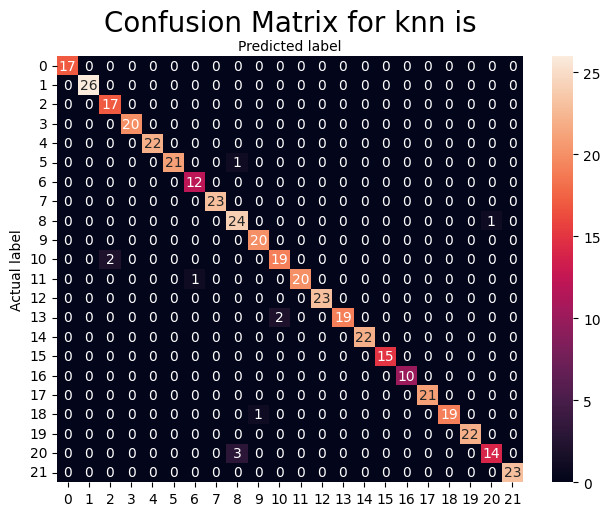

In [ ]:
##confusion matrix
class_names = np.arange(0,21)
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
cnf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True,fmt = 'd')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix for knn is', {'fontsize':20})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
print(knnclassifier.predict([[90,42,43,20.87,82,6.5,202.93]]))

['rice']


In [ ]:
pickle.dump(knnclassifier, open('model.pkl','wb'))